In [84]:
import pandas as pd
import seaborn as sns
from glob import glob
import json
import arrow
import matplotlib.pyplot as plt

%matplotlib inline

In [85]:
jsonfiles = glob("./data/runsessions/*.json")

In [86]:
results = []
for jsonfilepath in jsonfiles:
    with open(jsonfilepath) as out:
        j = json.load(out)
        results.append(j)

In [87]:
df = pd.DataFrame(results)

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
average_speed,124.0,9.209117e+00,2.214713e+00,0.000000e+00,8.844195e+00,9.796326e+00,1.063885e+01,1.157178e+01
avg_cadence,124.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
calories,124.0,2.219839e+02,7.602289e+01,0.000000e+00,1.635000e+02,2.315000e+02,2.512500e+02,6.470000e+02
created_at,125.0,1.527464e+12,1.107211e+10,1.483953e+12,1.519687e+12,1.527460e+12,1.536445e+12,1.544739e+12
distance,125.0,3.244472e+03,1.041166e+03,0.000000e+00,2.437000e+03,3.466000e+03,3.705000e+03,5.856000e+03
duration,125.0,1.381336e+06,7.191949e+05,0.000000e+00,9.102370e+05,1.262852e+06,1.594335e+06,4.532343e+06
duration_per_km,124.0,4.440838e+05,3.089368e+05,0.000000e+00,3.373880e+05,3.655155e+05,4.032150e+05,2.282608e+06
elevation_gain,124.0,3.404032e+01,1.604029e+01,0.000000e+00,2.500000e+01,3.350000e+01,4.700000e+01,1.000000e+02
elevation_loss,124.0,3.520968e+01,1.691791e+01,0.000000e+00,2.400000e+01,3.450000e+01,4.900000e+01,1.120000e+02
end_time,124.0,1.527531e+12,1.107900e+10,1.483953e+12,1.519602e+12,1.527589e+12,1.536464e+12,1.544739e+12


In [89]:
x = df.sort_values("start_time")
x.reindex(range(0, df.shape[0]), axis='index')
x.head()

,average_speed,avg_cadence,calories,cheering_enabled,completed,created_at,distance,duration,duration_per_km,edited,...,pulse_max,sport_type_id,start_time,start_time_timezone_offset,subjective_feeling_id,surface_id,temperature,updated_at,user_equipment_ids,weather_condition_id
54,5.527294,0.0,276.0,False,True,1483953477000,2937,1912907,651313.0,False,...,0,1,1483951430000,32400000,3,1,NaN,1544754024000,NaN,5
63,10.217961,0.0,241.0,False,True,1484436510000,3688,1299359,352321.0,False,...,0,1,1484434977000,32400000,3,NaN,NaN,1484436518000,NaN,NaN
75,3.666546,0.0,347.0,False,True,1484483458000,2516,2470336,981851.0,False,...,0,1,1484480988000,32400000,1,NaN,NaN,1484483496000,NaN,5
42,9.666340,0.0,160.0,True,True,1515284383000,2411,895313,371345.0,False,...,0,1,1515284352000,32400000,2,1,NaN,1516487301000,[5a63c2839076cb4ba100b747],NaN
18,9.595792,0.0,155.0,True,True,1515450907000,2332,871507,373717.0,False,...,0,1,1515450906000,32400000,3,1,NaN,1544754333000,[5a63c2839076cb4ba100b747],NaN


In [90]:
def preprocess(df):
    df = df.assign(
        start_at=[arrow.get(str(x/1000)).to("JST") for x in df.start_time] # unixtime --> datetime
    )
    df = df.assign(
        start_date=[x.date() for x in df.start_at],
        syear=[int(x.format("YYYY")) for x in df.start_at],
        smonth=[int(x.format("MM")) for x in df.start_at],
        sday=[int(x.format("DD")) for x in df.start_at],
        sweekday=[x.weekday() for x in df.start_at],
        shour=[int(x.format("HH")) for x in df.start_at]
    )
    df = df.sort_values("start_at")
    cols = ["duration", "distance","duration_per_km","start_at", "start_date","syear", "smonth","sday","sweekday", "shour"]
    res = df.loc[:, cols].query("syear == '2018'").sort_values("start_at")
    res.index = range(0, res.shape[0])
    return res

In [91]:
df.shape

(125, 36)

In [92]:
dat = preprocess(df)
dat.head()

,duration,distance,duration_per_km,start_at,start_date,syear,smonth,sday,sweekday,shour
0,895313,2411,371345.0,2018-01-07T09:19:12+09:00,2018-01-07,2018,1,7,6,9
1,871507,2332,373717.0,2018-01-09T07:35:06+09:00,2018-01-09,2018,1,9,1,7
2,913927,2468,370311.0,2018-01-10T06:54:48+09:00,2018-01-10,2018,1,10,2,6
3,859613,2410,356686.0,2018-01-11T06:52:48+09:00,2018-01-11,2018,1,11,3,6
4,796132,2375,335213.0,2018-01-12T07:03:01+09:00,2018-01-12,2018,1,12,4,7


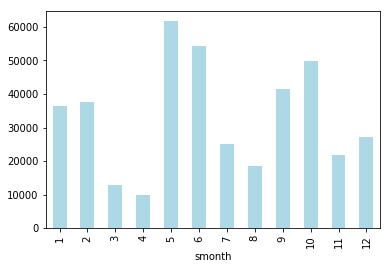

In [93]:
# 月ごとの走行距離（runtasticのアプリでも見れているデータ）
dat.groupby("smonth").sum().distance.plot(kind="bar", color="lightblue")

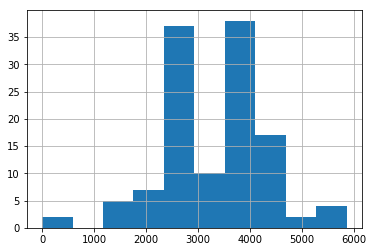

In [94]:
# 走行距離分布(単位:メートル)
# 3, 4キロあたりが多い。
dat.distance.hist()

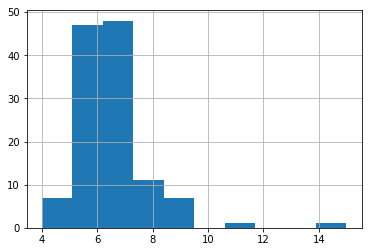

In [95]:
# ランニング開始時間 基本的に6-7時台
dat.shour.hist()

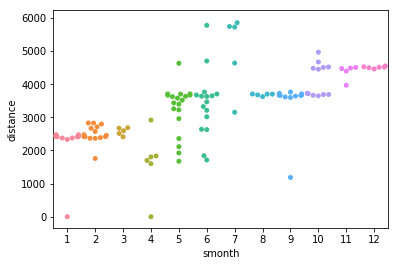

In [96]:
# １回あたりの走行距離の分布
sns.swarmplot(x="smonth", y="distance", data=dat)

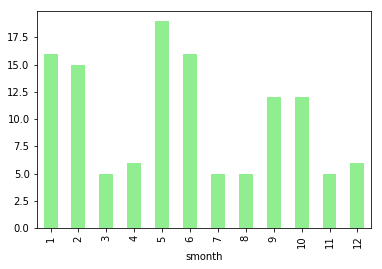

In [97]:
# 月ごとの走行回数
dat.groupby("smonth").count().start_date.plot(kind="bar", color="lightgreen")

データを見て思ったこと。

- 4, 7, 11, 12月で走る回数が減っている
  - 4月は仕事でもやもやしていた時期
  - 7月は息子爆誕。パパ業
  - 冬は寒い

- 5月、9月で持ち返している
  - 5月で産休の妻と実家に帰省。仕事もセーブしていたので暇だったw
  - 9月はDjp参加。筋トレチャンネルで報告を始めたのが良かったのかも

In [98]:
all_days

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-11-22', '2019-11-23', '2019-11-24', '2019-11-25',
               '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
               '2019-11-30', '2019-12-01'],
              dtype='datetime64[ns]', length=700, freq='D')

In [99]:
import calmap

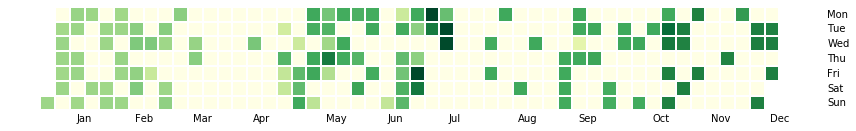

In [173]:
_dat = dat.loc[:,["start_date", "distance"]].groupby("start_date").sum()

x = pd.DataFrame(pd.Series(_dat.distance, index=days))


"""
calmap.calendarplot(x.distance, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='white', linewidth=0,
                    fig_kws=dict(figsize=(12, 8)));
"""


calmap.calendarplot(x.distance, cmap='YlGn',
                    fillcolor='white',
                    fig_kws=dict(figsize=(12, 8)));